# Praca domowa - Dominik Stańczak

In [19]:
from scipy.special import legendre
from scipy.optimize import brentq, fsolve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def chandrasekhar(n, tau):
    poly = legendre(2*n)
    root_order = np.argsort(poly.roots)
    mu = poly.roots[root_order]

    a = 2 / ((1-mu**2) * poly.deriv()(mu)**2)

    def W(k):
        return 1 - (a[n:, np.newaxis] / (1- (k * mu[n:, np.newaxis])**2)).sum(axis=0)

    if False:
        k = np.linspace(0, 7, 10000)
        w = W(k)
        plt.plot(k, w)
        plt.ylim(-5, 5)
        plt.grid()

    epsilon = 1e-6

    k_roots = []
    for i in range(n-1):
        lower_bound = mu[n+i+1]**-1 + epsilon
        upper_bound = mu[n+i]**-1 - epsilon
        root = brentq(W, lower_bound, upper_bound)
        k_roots.append(root)
    k_roots = np.asarray(k_roots)

    problem_matrix = np.zeros((n, n))
    problem_matrix[:,0] = 1
    problem_matrix[:,1:] = 1/(1+(k_roots[np.newaxis, :] * mu[:n, np.newaxis]))
    problem_matrix

    solutions = -np.linalg.solve(problem_matrix, mu[:n]) # nie jestem pewien tego minusa
    Q = solutions[0]
    L = solutions[1:]

    print(f"""========================
    stopień n = {n}
    miejsca zerowe wielomianu Legendre'a mu = {mu}
    wagi kwadratury gaussowskiej a = {a}
    stała Q = {Q}
    stałe L_i = {L}
    wykładniki k_i = {k_roots}""")
    def hopf_function(tau):
        exponent = -k_roots[np.newaxis, :] * tau[:, np.newaxis]
        exponents = L[np.newaxis, :] * np.exp(exponent)
        
        return Q + exponents.sum(axis=1)
    return hopf_function(tau)

    stopień n = 2
    miejsca zerowe wielomianu Legendre'a mu = [-0.86113631 -0.33998104  0.33998104  0.86113631]
    wagi kwadratury gaussowskiej a = [0.34785485 0.65214515 0.65214515 0.34785485]
    stała Q = 0.6940248023417992
    stałe L_i = [-0.11667453]
    wykładniki k_i = [1.97202659]
    stopień n = 3
    miejsca zerowe wielomianu Legendre'a mu = [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
    wagi kwadratury gaussowskiej a = [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]
    stała Q = 0.7038994182519845
    stałe L_i = [-0.10124511 -0.02530404]
    wykładniki k_i = [3.20294525 1.22521088]
    stopień n = 4
    miejsca zerowe wielomianu Legendre'a mu = [-0.96028986 -0.79666648 -0.52553241 -0.18343464  0.18343464  0.52553241
  0.79666648  0.96028986]
    wagi kwadratury gaussowskiej a = [0.10122854 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122854]
    stała Q = 0.7069178864384386
    stałe L_i = [-0

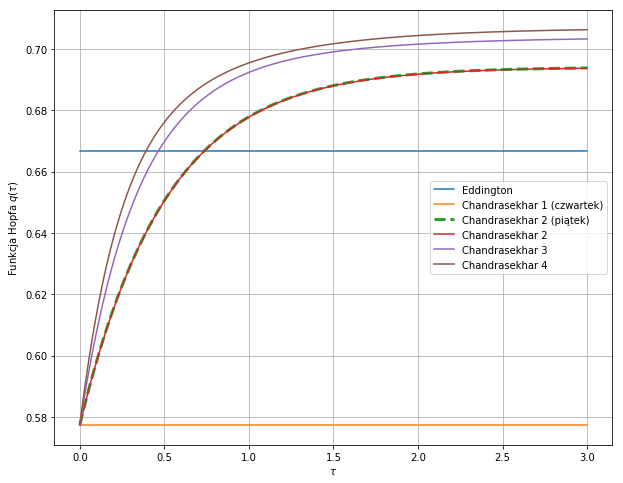

In [20]:
tau = np.linspace(0, 3, 1000)
plt.figure(figsize=(10,8))
plt.plot(tau, np.ones_like(tau) * 2/3, label="Eddington")
plt.plot(tau, np.ones_like(tau)  / 3**0.5, label="Chandrasekhar 1 (czwartek)")
plt.plot(tau, 0.6941 - 0.1167 * np.exp(-1.972*tau), "--", label="Chandrasekhar 2 (piątek)", lw=3)

for i in range(2, 5):
    plt.plot(tau, chandrasekhar(i, tau), label=f"Chandrasekhar {i}")
plt.xlabel(r"$\tau$")
plt.ylabel(r"Funkcja Hopfa $q(\tau)$")
plt.legend(loc='best')
plt.grid()
plt.savefig("hmm.png")